## This is a real code

# For Safety This a base code do not delete it

In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import os
import html
import csv

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
response.encoding = 'utf-8'   # Set the encoding to UTF-8 explicitly
pages = 6
page_size = 500

reviews = []

# Make sure the data folder exists
os.makedirs("data", exist_ok=True)

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    try:
        # Collect HTML data from this page
        response = requests.get(url)
        response.raise_for_status()  # Will raise an HTTPError for bad status codes

        # Parse content
        content = response.content
        parsed_content = BeautifulSoup(content, 'html.parser')

        for article in parsed_content.find_all("article", {"itemprop": "review"}):
            review = {}

            # Extract review title
            review_title = article.find("h2", {"class": "text_header"}).get_text(strip=True)
            review["title"] = html.unescape(review_title)

            # Extract review body
            review_body = article.find("div", {"class": "text_content"}).get_text(strip=True)
            review_body = html.unescape(review_body)  # Ensure correct HTML entity decoding
            
            # Remove everything before and including "|"
            if "|" in review_body:
                review_body = review_body.split("|", 1)[1].strip()

            review["body"] = review_body

            # Extract review rating
            rating_value = article.find("span", {"itemprop": "ratingValue"}).get_text(strip=True)
            review["rating"] = rating_value

            # Extract reviewer name
            reviewer_name = article.find("span", {"itemprop": "name"}).get_text(strip=True)
            review["reviewer_name"] = reviewer_name

            # Extract review date
            review_date = article.find("time", {"itemprop": "datePublished"})["datetime"]
            review["date"] = review_date

            # Extract additional metadata (travel details)
            metadata = article.find_all("tr")
            for row in metadata:
                header = row.find("td", {"class": "review-rating-header"})
                value = row.find("td", {"class": "review-value"})
                if header and value:
                    header_text = header.get_text(strip=True)
                    value_text = value.get_text(strip=True)
                    review[header_text] = value_text

            # Extract Seat Comfort rating
            seat_comfort_row = article.find("td", {"class": "review-rating-header seat_comfort"})
            if seat_comfort_row:
                seat_comfort_stars = seat_comfort_row.find_next("td", {"class": "review-rating-stars"})
                if seat_comfort_stars:
                    seat_comfort_rating = len(seat_comfort_stars.find_all("span", {"class": "star fill"}))
                    review["seat_comfort_rating"] = int(seat_comfort_rating)

            # Extract Cabin Staff Service rating
            cabin_staff_service_row = article.find("td", {"class": "review-rating-header cabin_staff_service"})
            if cabin_staff_service_row:
                cabin_staff_service_stars = cabin_staff_service_row.find_next("td", {"class": "review-rating-stars"})
                if cabin_staff_service_stars:
                    cabin_staff_service_rating = len(cabin_staff_service_stars.find_all("span", {"class": "star fill"}))
                    review["cabin_staff_service_rating"] = int(cabin_staff_service_rating)

            # Extract Ground Service rating
            ground_service_row = article.find("td", {"class": "review-rating-header ground_service"})
            if ground_service_row:
                ground_service_stars = ground_service_row.find_next("td", {"class": "review-rating-stars"})
                if ground_service_stars:
                    ground_service_rating = len(ground_service_stars.find_all("span", {"class": "star fill"}))
                    review["ground_service_rating"] = int(ground_service_rating)

            # Extract Value For Money rating
            value_for_money_row = article.find("td", {"class": "review-rating-header value_for_money"})
            if value_for_money_row:
                value_for_money_stars = value_for_money_row.find_next("td", {"class": "review-rating-stars"})
                if value_for_money_stars:
                    value_for_money_rating = int(len(value_for_money_stars.find_all("span", {"class": "star fill"})))
                    review["value_for_money_rating"] = int(value_for_money_rating)

            reviews.append(review)
        
        print(f"   ---> {len(reviews)} total reviews")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching page {i}: {e}")

    # To avoid hitting the server too quickly
    time.sleep(1)

# Convert reviews into DataFrame
df = pd.DataFrame(reviews)

# Save to CSV file
df.to_csv("British_Airline_Reviews.csv", index=False, encoding="utf-8", quoting=csv.QUOTE_MINIMAL)

print(f"Scraping complete. {len(reviews)} reviews saved to 'British_Airline_Reviews.csv'.")


Scraping page 1
   ---> 500 total reviews
Scraping page 2
   ---> 1000 total reviews
Scraping page 3
   ---> 1500 total reviews
Scraping page 4
   ---> 2000 total reviews
Scraping page 5
   ---> 2500 total reviews
Scraping page 6
   ---> 3000 total reviews
Scraping complete. 3000 reviews saved to 'British_Airline_Reviews.csv'.


# Final Code for further process

In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import os
import html
import csv

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# Ensure data directory exists
os.makedirs("data", exist_ok=True)

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    try:
        response = requests.get(url)
        response.raise_for_status()
        response.encoding = 'utf-8'  # Explicit UTF-8 encoding

        parsed_content = BeautifulSoup(response.content, 'html.parser')

        for article in parsed_content.find_all("article", {"itemprop": "review"}):
            review = {}

            # Extract review title
            title_element = article.find("h2", {"class": "text_header"})
            review["title"] = html.unescape(title_element.get_text(strip=True)) if title_element else "N/A"

            # Extract review body
            body_element = article.find("div", {"class": "text_content"})
            review_body = html.unescape(body_element.get_text(strip=True)) if body_element else "N/A"

            # Remove content before '|'
            if "|" in review_body:
                review_body = review_body.split("|", 1)[1].strip()

            review["body"] = review_body

            # Extract review rating
            rating_element = article.find("span", {"itemprop": "ratingValue"})
            review["rating"] = rating_element.get_text(strip=True) if rating_element else "N/A"

            # Extract reviewer name
            name_element = article.find("span", {"itemprop": "name"})
            review["reviewer_name"] = name_element.get_text(strip=True) if name_element else "Anonymous"

            # Extract review date
            date_element = article.find("time", {"itemprop": "datePublished"})
            review["date"] = date_element["datetime"] if date_element else "Unknown"

            # Extract additional metadata
            metadata = article.find_all("tr")
            for row in metadata:
                header = row.find("td", {"class": "review-rating-header"})
                value = row.find("td", {"class": "review-value"})
                if header and value:
                    review[header.get_text(strip=True)] = value.get_text(strip=True)

            # Extract ratings for specific categories
            rating_categories = ["seat_comfort", "cabin_staff_service", "ground_service", "value_for_money"]
            for category in rating_categories:
                row = article.find("td", {"class": f"review-rating-header {category}"})
                if row:
                    stars = row.find_next("td", {"class": "review-rating-stars"})
                    if stars:
                        review[f"{category}_rating"] = len(stars.find_all("span", {"class": "star fill"}))

            reviews.append(review)

        print(f"   ---> {len(reviews)} total reviews")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching page {i}: {e}")

    # Delay to prevent excessive requests
    time.sleep(2)

# Convert to DataFrame and save to CSV
df = pd.DataFrame(reviews)
df.to_csv("-British_Airline_Reviews.csv", index=False, encoding="utf-8", quoting=csv.QUOTE_MINIMAL)

print(f"Scraping complete.\n{len(reviews)} reviews saved to 'British_Airline_Reviews.csv'.")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping complete.
1000 reviews saved to 'British_Airline_Reviews.csv'.


In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("British_Airline_Reviews.csv")

# Display the first few rows
print(df.head(10))  # Shows first 5 rows in table format


                                          title  \
0  "70 days chasing BA’s complaints department"   
1                  "BA refused to reimburse me"   
2                      "the flight was delayed"   
3             "BA forced us to buy new tickets"   
4            “staff had no sympathy or empathy”   
5                        "the seat is outdated"   
6                         "a national disgrace"   
7        "sheer neglect in keeping us informed"   
8                       "a huge disappointment"   
9               "we had to bus to the aircraft"   

                                                body  rating  \
0  I booked through BA because Loganair don’t hav...       1   
1  British airways lost bags in LHR then found th...       1   
2  The check in process and reward/loyalty progra...       1   
3  We flew in November 2023, but it took this lon...       1   
4  I left for London from Johannesburg at 21:15 o...       1   
5  After an excellent flight on a 777 CPT to LHR ...  

In [2]:
print(df.columns)

Index(['title', 'body', 'rating', 'reviewer_name', 'date', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Recommended',
       'ground_service_rating', 'value_for_money_rating',
       'seat_comfort_rating', 'cabin_staff_service_rating', 'Aircraft'],
      dtype='object')


Total Yes: 1048
Total No: 1952


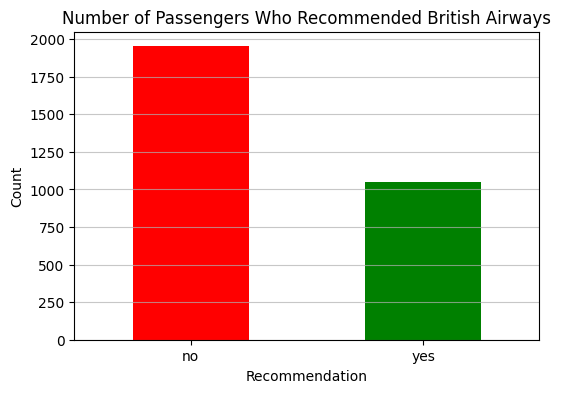

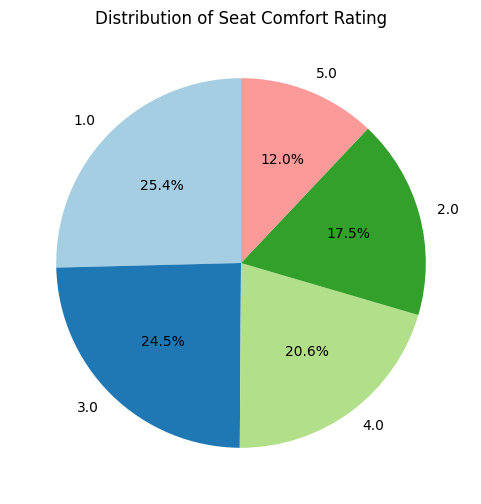

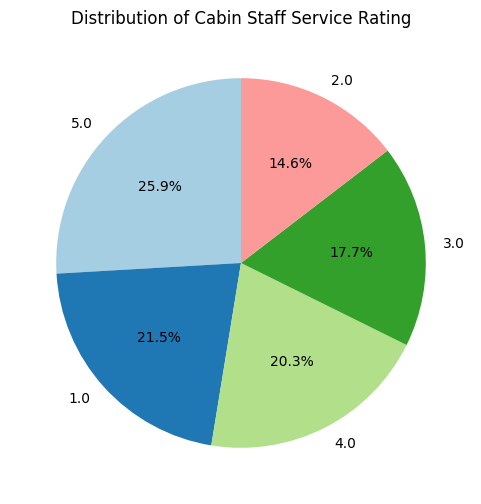

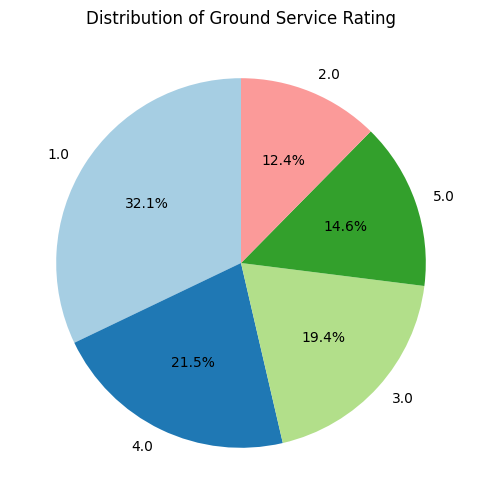

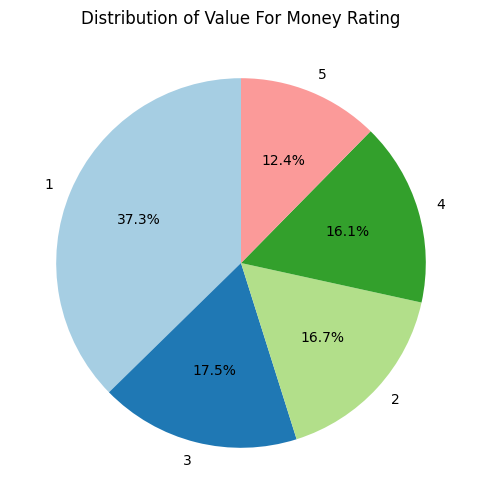

Total passengers in 2024: 176

Seat Type Distribution in 2024:
seat type
Economy Class      95
Business Class     62
Premium Economy    14
First Class         5
Name: count, dtype: int64


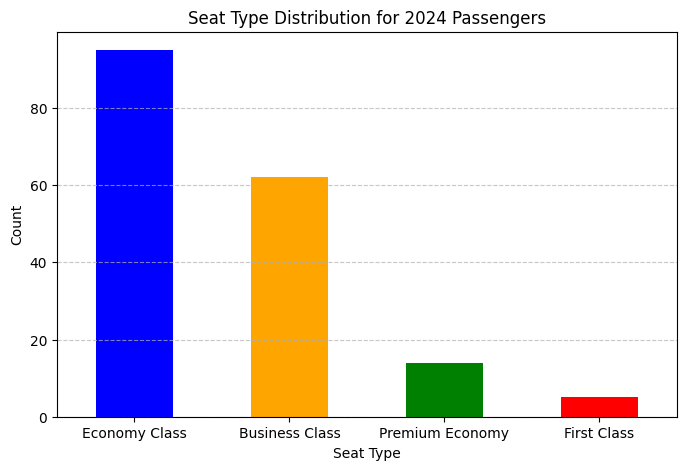


Month with the highest number of passengers each year:
     year  month  count
2    2015     10     78
15   2016     11     66
20   2017      4     67
32   2018      4     34
50   2019     10     41
53   2020      1     34
73   2021     10     20
79   2022      4     29
93   2023      6     32
107  2024      8     25
112  2025      1      6


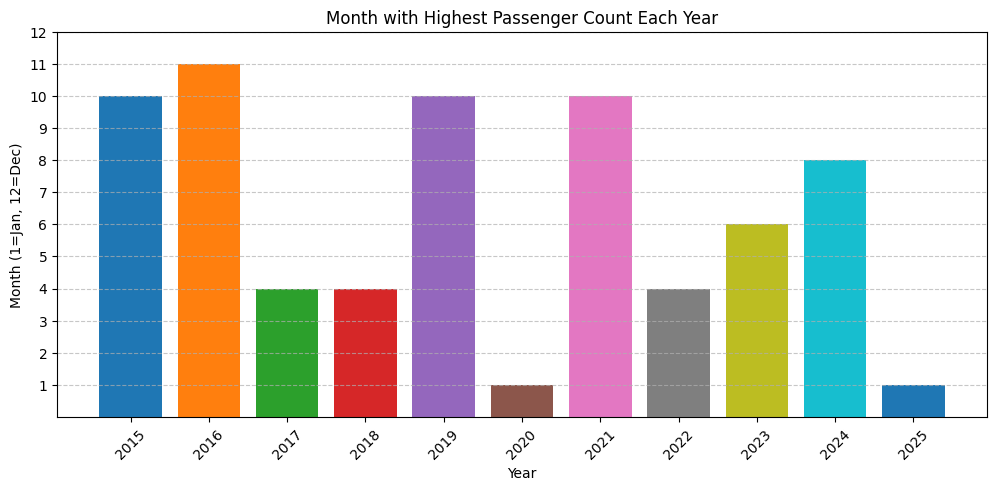

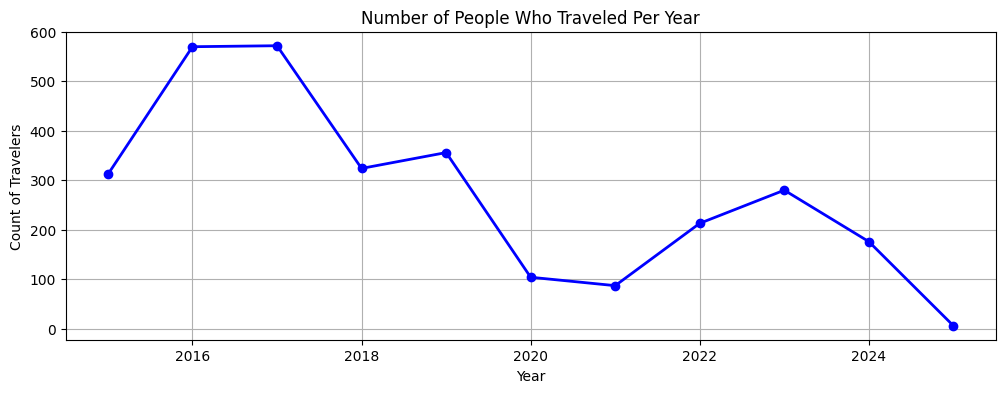

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("British_Airline_Reviews.csv")

# Ensure column name consistency (case-insensitive handling)
df.columns = df.columns.str.strip().str.lower()

# Clean the 'recommended' column: strip spaces and convert to lowercase
df["recommended"] = df["recommended"].astype(str).str.strip().str.lower()

# Count the occurrences of 'yes' and 'no' in the 'recommended' column
recommended_counts = df["recommended"].value_counts()

# Print the counts
print(f"Total Yes: {recommended_counts.get('yes', 0)}")
print(f"Total No: {recommended_counts.get('no', 0)}")

# Plot the bar chart for 'recommended'
plt.figure(figsize=(6, 4))
recommended_counts.plot(kind="bar", color=['red', 'green'])

# Customize plot
plt.title("Number of Passengers Who Recommended British Airways")
plt.xlabel("Recommendation")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis="y", alpha=0.7)

# Show the plot
plt.show()

# List of rating columns
rating_columns = [
    'seat_comfort_rating', 'cabin_staff_service_rating', 
    'ground_service_rating', 'value_for_money_rating'
]

# Plot pie charts for each rating column
for column in rating_columns:
    # Count the occurrences of each rating (assumes ratings are discrete, e.g., integers 1-5)
    rating_counts = df[column].value_counts()
    
    # Plot the pie chart for the rating column
    plt.figure(figsize=(6, 6))
    rating_counts.plot(kind="pie", autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
    
    # Customize plot
    plt.title(f"Distribution of {column.replace('_', ' ').title()}")
    plt.ylabel("")  # Hide the y-label for clarity
    
    # Show the plot
    plt.show()

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Filter only reviews from 2024
df_2024 = df[df["date"].dt.year == 2024]

# Check if 'seat type' column exists, adjust name if needed
seat_column = "seat type"  # Change if your dataset uses a different name
if seat_column not in df_2024.columns:
    print(f"Column '{seat_column}' not found in dataset.")
else:
    # Count seat type occurrences in 2024
    seat_counts = df_2024[seat_column].value_counts()

    # Print results
    print(f"Total passengers in 2024: {df_2024.shape[0]}")
    print("\nSeat Type Distribution in 2024:")
    print(seat_counts)

    # Plot the data
    plt.figure(figsize=(8, 5))
    seat_counts.plot(kind="bar", color=['blue', 'orange', 'green', 'red', 'yellow'])

    # Customize chart
    plt.title("Seat Type Distribution for 2024 Passengers")
    plt.xlabel("Seat Type")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()

# Extract year and month
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# Count number of passengers per month for each year
monthly_counts = df.groupby(["year", "month"]).size().reset_index(name="count")

# Find the month with the highest count in each year
max_passengers_per_year = monthly_counts.loc[monthly_counts.groupby("year")["count"].idxmax()]

# Print the results
print("\nMonth with the highest number of passengers each year:")
print(max_passengers_per_year)

# Plot the data
plt.figure(figsize=(12, 5))
for year in max_passengers_per_year["year"].unique():
    subset = max_passengers_per_year[max_passengers_per_year["year"] == year]
    plt.bar(subset["year"].astype(str), subset["month"], label=f"Year {year}")

# Customize chart
plt.title("Month with Highest Passenger Count Each Year")
plt.xlabel("Year")
plt.ylabel("Month (1=Jan, 12=Dec)")
plt.xticks(rotation=45)
plt.yticks(range(1, 13))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

# Count the number of people who traveled per year (assuming each row represents a traveler)
travel_count_per_year = df['year'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 4))
plt.plot(travel_count_per_year.index, travel_count_per_year.values, marker='o', color='b', linestyle='-', linewidth=2)

# Customize plot
plt.title("Number of People Who Traveled Per Year")
plt.xlabel("Year")
plt.ylabel("Count of Travelers")
plt.grid(True)

# Show the plot
plt.show()


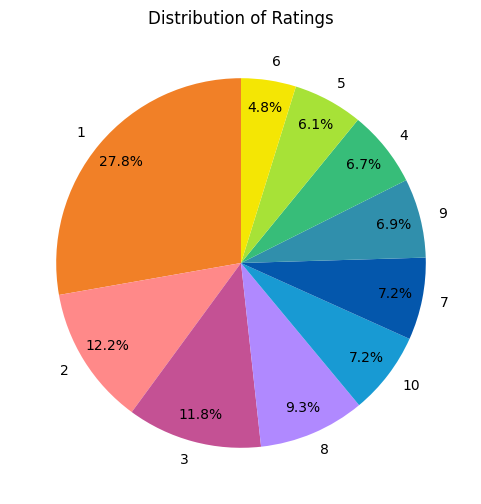

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("British_Airline_Reviews.csv")

# Ensure column names are lowercase and remove spaces
df.columns = df.columns.str.strip().str.lower()

# Calculate the percentage distribution of the 'rating' column
rating_counts = df['rating'].value_counts()

# Define the custom hex colors
colors = ['#f18027', '#FF8989', '#C45194', '#B089FF', '#189ad3', '#0457ac', '#308fac', '#37bd79', '#a7e237', '#f4e604']

# Plot the pie chart for 'rating' column
plt.figure(figsize=(6, 6))
rating_counts.plot(kind="pie", autopct='%1.1f%%', colors=colors[:len(rating_counts)], startangle=90, legend=False,
                   textprops={'color': 'black'}, pctdistance=0.85, labeldistance=1.1)  # Position labels outside

# Customize plot
plt.title("Distribution of Ratings")
plt.ylabel("")  # Hide the y-label for clarity

# Show the plot
plt.show()


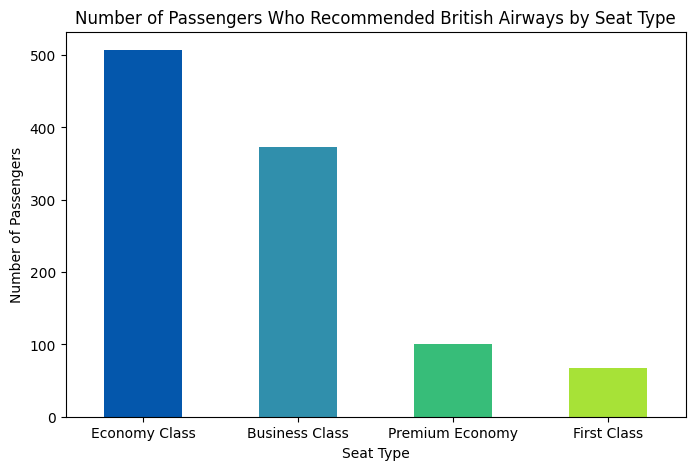

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("British_Airline_Reviews.csv")

# Ensure column name consistency (case-insensitive handling)
df.columns = df.columns.str.strip().str.lower()

# Clean 'recommended' column to handle yes/no responses consistently
df["recommended"] = df["recommended"].astype(str).str.strip().str.lower()

# Filter rows where 'recommended' is 'yes'
recommended_yes_df = df[df["recommended"] == "yes"]

# Count the number of "yes" recommendations per seat type
recommended_yes_counts = recommended_yes_df["seat type"].value_counts()

# Define the hex colors
colors = ['#0457ac', '#308fac', '#37bd79', '#a7e237', '#f4e604']

# Plot the bar chart
plt.figure(figsize=(8, 5))
recommended_yes_counts.plot(kind="bar", color=colors[:len(recommended_yes_counts)])  # Cycle through colors

# Customize chart
plt.title("Number of Passengers Who Recommended British Airways by Seat Type")
plt.xlabel("Seat Type")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)  # Rotate labels for readability


# Show the plot
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("British_Airline_Reviews.csv")

# Ensure column name consistency (case-insensitive handling)
df.columns = df.columns.str.strip().str.lower()

# Count the occurrences of each route
route_counts = df["route"].value_counts()

# Display the route with the highest count
most_travelled_route = route_counts.idxmax()
most_travelled_count = route_counts.max()

print(f"Route with the most passengers: {most_travelled_route}")
print(f"Number of passengers: {most_travelled_count}")


Route with the most passengers: London to Johannesburg
Number of passengers: 20


In [7]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_British_Airline_Reviews.csv")

# Ensure column name consistency (case-insensitive handling)
df.columns = df.columns.str.strip().str.lower()

# Filter rows where sentiment is 'negative'
negative_sentiment_df = df[df['sentiment'] == 'negative']

# Count the occurrences of each route for negative sentiment
negative_route_counts = negative_sentiment_df['route'].value_counts()

# Get the route with the most negative sentiments
most_negative_route = negative_route_counts.idxmax()
most_negative_count = negative_route_counts.max()

# Print the results
print(f"Route with the most negative sentiment: {most_negative_route}")
print(f"Number of negative sentiments: {most_negative_count}")

# Filter the negative sentiment reviews for the most negative route
route_reviews = negative_sentiment_df[negative_sentiment_df['route'] == most_negative_route]

# Display the titles of passengers who gave negative feedback
titles_of_negative_feedback = route_reviews['title'].tolist()
print(f"Titles of passengers who gave negative feedback for route '{most_negative_route}':")
for title in titles_of_negative_feedback:
    print(title)


Route with the most negative sentiment: London to Hong Kong
Number of negative sentiments: 4
Titles of passengers who gave negative feedback for route 'London to Hong Kong':
"Not as much as an apology"
"some sort of medieval torture"
"downright rude and abusive"
"cancelled a flight booked three months ago "


In [8]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_British_Airline_Reviews.csv")

# Ensure column name consistency (case-insensitive handling)
df.columns = df.columns.str.strip().str.lower()

# Filter rows where 'recommended' is 'yes'
recommended_df = df[df['recommended'].str.lower() == 'yes']

# Count occurrences of each route where passengers recommended 'yes'
recommended_route_counts = recommended_df['route'].value_counts()

# Get the route with the most recommendations
most_recommended_route = recommended_route_counts.idxmax()
most_recommended_count = recommended_route_counts.max()

# Print the results
print(f"Route with the most 'Yes' recommendations: {most_recommended_route}")
print(f"Number of people who recommended 'Yes' on this route: {most_recommended_count}")


Route with the most 'Yes' recommendations: Vancouver to London
Number of people who recommended 'Yes' on this route: 8


Total Yes: 310
Total No: 690


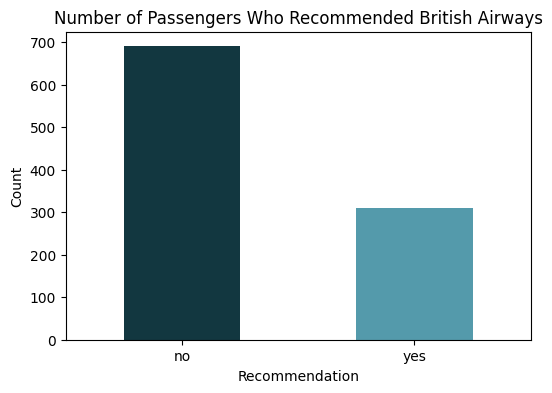

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure column name consistency (case-insensitive handling)
df.columns = df.columns.str.strip().str.lower()

# Clean the 'recommended' column: strip spaces and convert to lowercase
df["recommended"] = df["recommended"].astype(str).str.strip().str.lower()

# Count the occurrences of 'yes' and 'no' in the 'recommended' column
recommended_counts = df["recommended"].value_counts()

# Print the counts
print(f"Total Yes: {recommended_counts.get('yes', 0)}")
print(f"Total No: {recommended_counts.get('no', 0)}")

# Plot the bar chart for 'recommended'
plt.figure(figsize=(6, 4))
recommended_counts.plot(kind="bar", color=['#123740', '#549aab'])

# Customize plot
plt.title("Number of Passengers Who Recommended British Airways")
plt.xlabel("Recommendation")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep labels horizontal


# Show the plot
plt.show()


In [112]:
!pip uninstall numpy gensim -y


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3


In [113]:
!pip install numpy gensim --no-cache-dir


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ------ --------------------------------- 3.7/24.0 MB 19.8 MB/s eta 0:00:02
   ----------------- ---------------------- 10.2/24.0 MB 26.6 MB/s eta 0:00:01
   ------------------------ --------------- 14.9/24.0 MB 25.4 MB/s eta 0:00:01
   ------------------------------------- -- 22.5/24.0 MB 28.5 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 28.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------- ----------------------- 6.6/15.5 MB 28.7 MB/s eta 0:00:01
   ----------------------------------- ---- 13.6/15.5 MB 32.8 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 30.5 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rnarute\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load dataset
df = pd.read_csv("cleaned_British_Airline_Reviews.csv")

# Get the most extreme reviews
top_positive = df.nlargest(5, 'sentiment_score')  # Top 5 positive reviews
top_negative = df.nsmallest(5, 'sentiment_score')  # Top 5 negative reviews

# Combine both extreme sets
extreme_reviews = pd.concat([top_positive, top_negative])

# Preprocessing function
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing
extreme_reviews["processed_text"] = extreme_reviews["cleaned_body"].apply(preprocess_text)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(extreme_reviews["processed_text"])
corpus = [dictionary.doc2bow(text) for text in extreme_reviews["processed_text"]]

# Apply LDA topic modeling
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Display topics
for idx, topic in lda_model.show_topics(formatted=True, num_words=5):
    print(f"Topic {idx+1}: {topic}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rnarute\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rnarute\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\rnarute/nltk_data'
    - 'C:\\Users\\rnarute\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\rnarute\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\rnarute\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\rnarute\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
